<a href="https://colab.research.google.com/github/trsk3333/chatgpt/blob/main/chatgpt_03_hf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatGpt 3 házifeladat

## A feladat megoldása ChatGpt-vel:

### Promt:

Egy senior python fejlesztő vagy, aki szintén ért a matematikához, azon belül a kedvenc területed a gráfelmélet. A feladatod a következő: Írj egy olyan programot ami megkeresi az alábbi szövegben az összes alanyt, állítmányt és tárgyat, majd készít egy gráfot pythonban! A gráf élei legyenek az állítmányok, csúcsai az alany és a tárgy.

Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója.

Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is.

### Megoldás (hibás)

In [11]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

def extract_spo(text):
    nlp = spacy.load("hu_core_news_lg")  # Magyar nyelvű NLP modell

    doc = nlp(text)
    spo_list = []

    for sent in doc.sents:
        subject, predicate, obj = None, None, None

        for token in sent:
            if "nsubj" in token.dep_:
                subject = token.text
            elif "ROOT" in token.dep_:
                predicate = token.text
            elif "obj" in token.dep_:
                obj = token.text

        if subject and predicate and obj:
            spo_list.append((subject, predicate, obj))

    return spo_list

def create_graph(spo_list):
    G = nx.DiGraph()

    for subject, predicate, obj in spo_list:
        G.add_edge(subject, obj, label=predicate)

    return G

def draw_graph(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.show()

if __name__ == "__main__":
    text = """Rejtő Jenő legismertebb művei látszatra ponyvaregények. Életművét értékelik. Verseket írt. Novellákat adott közre."""
    spo_list = extract_spo(text)
    if spo_list:
        G = create_graph(spo_list)
        draw_graph(G)



OSError: [E050] Can't find model 'hu_core_news_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

Javítva:

In [ ]:
!pip install hu_core_news_lg@https://huggingface.co/huspacy/hu_core_news_lg/resolve/main/hu_core_news_lg-any-py3-none-any.whl

In [10]:
%matplotlib inline

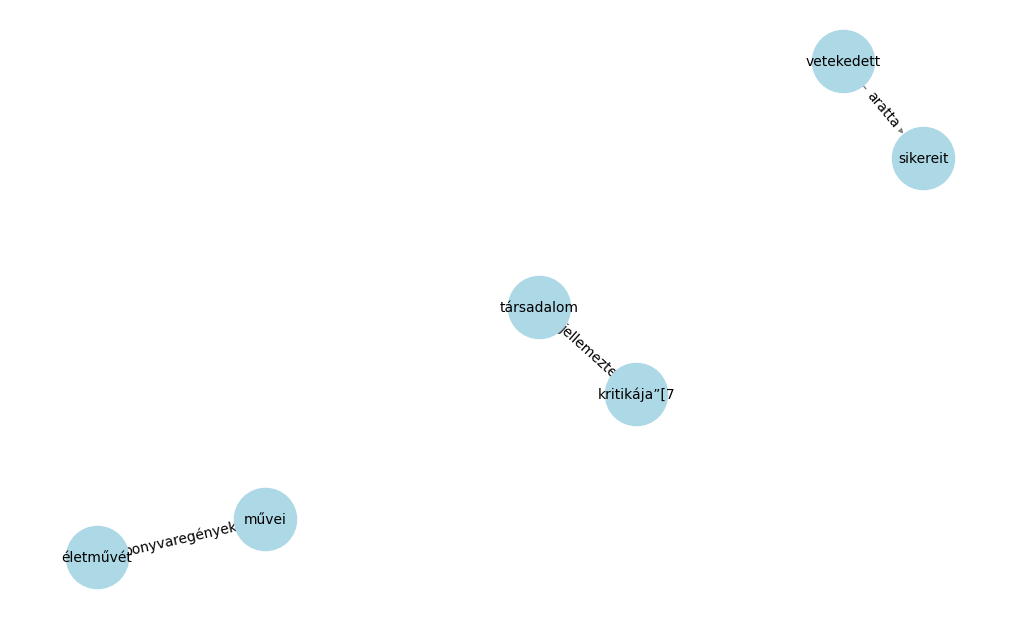

In [11]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

def extract_spo(text):
    try:
        nlp = spacy.load("hu_core_news_lg")
    except OSError:
        print("A 'hu_core_news_trf' modell nincs telepítve. Telepítsd a következő paranccsal:")
        print("pip install hu_core_news_lg@https://huggingface.co/huspacy/hu_core_news_lg/resolve/main/hu_core_news_lg-any-py3-none-any.whl")
        return []

    doc = nlp(text)
    spo_list = []

    for sent in doc.sents:
        subject, predicate, obj = None, None, None

        for token in sent:
            if "nsubj" in token.dep_:
                subject = token.text
            elif "ROOT" in token.dep_:
                predicate = token.text
            elif "obj" in token.dep_:
                obj = token.text

        if subject and predicate and obj:
            spo_list.append((subject, predicate, obj))

    return spo_list

def create_graph(spo_list):
    G = nx.DiGraph()

    for subject, predicate, obj in spo_list:
        G.add_edge(subject, obj, label=predicate)

    return G

def draw_graph(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.show()

if __name__ == "__main__":
    text = """Rejtő Jenő (született Reich, írói álnevei: P. Howard, Gibson Lavery) (Budapest, Erzsébetváros, 1905. március 29.[6] – Jevdakovo(wd), Kamenkai járás, Voronyezsi terület, oroszországi megszállt övezet, Szovjetunió, 1943. január 1.) magyar író, kabaré- és színpadi szerző, filmíró, a magyar szórakoztató irodalom népszerű képviselője és megújítója. Legismertebb művei látszatra ponyvaregények, azonban életművét ma már nagyra értékelik. Kamaszkorában verseket írt (ezeket nem publikálta), majd 1928-tól komor hangulatú novellákat adott közre a napisajtóban. Az 1930-as évek elején kabarédarabokkal és bohózatokkal jelentkezett a pesti színpadokon. Ezzel egyidőben füzetes ponyvákat, majd operetteket, végül – részben külföldi utazásai során szerzett élményeire támaszkodva – kalandregényeket alkotott. Sajátos stílusát egyéni, groteszk, nyelvi humor és „váratlan abszurd fordulatok, szürreális, gyakran kispolgári figurák és a társadalom fanyar humorba csomagolt kritikája”[7] jellemezte. Legnagyobb sikereit P. Howard álnéven írott ponyvaparódiáival aratta, olvasottsága[8] a Kádár-korban Jókai Móréval vetekedett. A pesti művészi élet ismert alakja volt, barátság fűzte a kor jelentős művészeihez, így például Karinthy Frigyeshez,[9] Kabos Gyulához, Latabár Kálmánhoz, Salamon Bélához is."""
    spo_list = extract_spo(text)
    if spo_list:
        G = create_graph(spo_list)
        draw_graph(G)

